In [1]:
import umap
import pandas as pd
from dissection_table.operations.sources import *
from dissection_table.database.sources_formatting import *

from dissection_table.operations.frequencies import *
from pgvector.sqlalchemy import Vector
from dissection_table.database.engine import init_db
from dissection_table.database.ask_db import *

from dissection_table.database.sources_formatting import feed_database
from dissection_table.operations.version_corpus import Corpus
from constants import *
from dissection_table.database.db_interface import DBInterface
await init_db(CONN_STRING)
import time
DBInterface.initialize_engine_and_session(CONN_STRING)
import matplotlib.pyplot as plt
from langchain_ollama import OllamaEmbeddings

Database 'dissection_table' already exists.
Ensuring database tables exist...
Database tables checked/created.
Database initialization complete.
DBInterface: SQLAlchemy engine and AsyncSessionLocal initialized.


/home/jon/anaconda3/envs/real_real_nlp/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
await feed_database()

ollama_and_umap_models_load
models_loaded
####
portuguese_1
####
$$$
getting version
version done
embeddings
end of embedding
umap embedding


/home/jon/anaconda3/envs/real_real_nlp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


end_umap embedding
Successfully performed bulk insert for 1447 items in Paragraph.
####
spanish_1
####
$$$
getting version
version done
embeddings
end of embedding
umap embedding
end_umap embedding
Successfully performed bulk insert for 1444 items in Paragraph.
####
spanish_2
####
$$$
getting version
version done
embeddings
end of embedding
umap embedding
end_umap embedding
Successfully performed bulk insert for 1447 items in Paragraph.
####
english_1
####
$$$
getting version
version done
embeddings
end of embedding
umap embedding
end_umap embedding
Successfully performed bulk insert for 1464 items in Paragraph.
####
english_2
####
$$$
getting version
version done
embeddings
end of embedding
umap embedding
end_umap embedding
Successfully performed bulk insert for 1447 items in Paragraph.
####
italian_1
####
$$$
getting version
version done
embeddings
end of embedding
umap embedding
end_umap embedding
Successfully performed bulk insert for 1444 items in Paragraph.
####
french_1
####
$$$

In [15]:
original = await Corpus.create("french_1")

In [5]:
q = await original.all_paragraphs()

In [6]:
q[544]

'no están ustedes muertos les pregunté'

In [60]:
from langchain_ollama import OllamaEmbeddings
ollama_emb = OllamaEmbeddings(model="granite-embedding:278m")

In [ ]:
# reducer.fit_transform(embeddings_list)

In [3]:
# await open_request("DROP TABLE version;")
# await open_request("DROP TABLE paragraph;")

In [3]:
#await feed_database()

In [4]:
'popo'

'popo'

In [5]:
#await get_all_embeddings('spanish_1')

In [3]:
original_1 = await Corpus.create("spanish_1")
original = await Corpus.create("spanish_2")
english_1 =  await Corpus.create("english_1")
english_2 =  await Corpus.create("english_2")
italian_1 =  await Corpus.create("italian_1")
portuguese_1 =  await Corpus.create("portuguese_1")
french_1 = await Corpus.create("french_1")

In [10]:
print(await original.n_paragraph(15))
print(await original_1.n_paragraph(15))
print(await italian_1.n_paragraph(15))
print(await english_1.n_paragraph(16))
print(await french_1.n_paragraph(16))
print(await portuguese_1.n_paragraph(16))


voy a ver a mi padre contesté
voy a ver a mi padre contesté
vado a trovare mio padre risposi
i've come to see my father i replied
ah
vou ver meu pai respondi


In [14]:
original.n_words

33369

In [17]:
p = await original.all_paragraphs()

In [18]:
len(p)

1447

In [19]:
original_1.n_words

33375

In [6]:
a = await english_1.all_umap()
b = await original.all_umap()
c = await italian_1.all_umap()
d = await portuguese_1.all_umap()
e = await english_2.all_umap()
f =  await original_1.all_umap()
g = await french_1.all_umap()

a_emb = await english_1.all_embeddings()
b_emb = await original.all_embeddings()
c_emb = await italian_1.all_embeddings()
d_emb = await portuguese_1.all_embeddings()
d_emb = await english_2.all_embeddings()
f_emb = await original_1.all_embeddings()
g_emb = await french_1.all_embeddings()


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # For potential color palettes or general styling, though not strictly required for basic 3D scatter

def plot_3d_umap_embeddings(embeddings_list: list[np.ndarray], labels_list: list[str], 
                            title: str = "3D UMAP Embeddings Comparison"):
    """
    Generates a 3D scatter plot for multiple sets of UMAP embeddings.

    Args:
        embeddings_list (list[np.ndarray]): A list of NumPy arrays, where each array
                                            contains 3D UMAP embeddings.
                                            Expected shape for each array: (n_samples, 3).
        labels_list (list[str]): A list of labels, corresponding to each set of embeddings
                                 in embeddings_list.
        title (str): The title of the plot.

    Raises:
        ValueError: If any input embeddings array is not 3-dimensional,
                    or if the number of embeddings sets does not match the number of labels.
    """
    if len(embeddings_list) != len(labels_list):
        raise ValueError("The number of embedding arrays must match the number of labels.")

    # Create a new figure and a 3D subplot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Get a color palette from seaborn, ensuring enough colors for all datasets
    colors = sns.color_palette("bright", n_colors=len(embeddings_list))

    # Iterate through each set of embeddings and its corresponding label
    for i, (embeddings, label) in enumerate(zip(embeddings_list, labels_list)):
        # Basic validation: Ensure embeddings are 3-dimensional
        if embeddings.shape[1] != 3:
            raise ValueError(f"Embeddings set '{label}' must have 3 columns for 3D plotting, but has {embeddings.shape[1]}.")

        # Plot the current set of embeddings
        ax.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], 
                   label=label, s=20, alpha=0.2, color=colors[i])

    # Set labels for the axes
    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')
    ax.set_zlabel('UMAP Component 3')

    # Set the title and add a legend
    ax.set_title(title)
    ax.legend()

    # Optional: Adjust view angle for better visualization
    ax.view_init(elev=20, azim=-60) # You can play with these values

    # Show the plot
    plt.show()


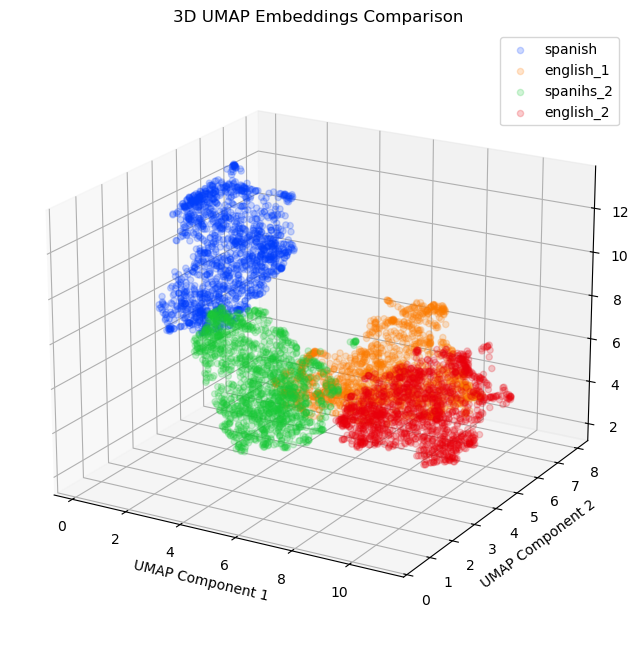

/tmp/ipykernel_699031/1047820639.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


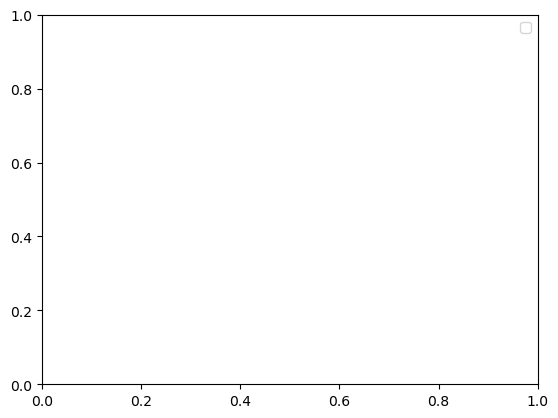

In [13]:
import matplotlib.pyplot as plt
plot_3d_umap_embeddings([b,a,f,e],["spanish", "english_1","spanihs_2","english_2"], 
                        title= "3D UMAP Embeddings Comparison")
plt.legend()

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # For potential color palettes or general styling, though not strictly required for basic 3D scatter

def plot_3d_umap_embeddings(embeddings1: np.ndarray, label1: str, 
                            embeddings2: np.ndarray, label2: str, 
                            title: str = "3D UMAP Embeddings Comparison"):
    """
    Generates a 3D scatter plot comparing two sets of UMAP embeddings.

    Args:
        embeddings1 (np.ndarray): The first NumPy array of 3D UMAP embeddings.
                                  Expected shape: (n_samples, 3).
        label1 (str): A label for the first set of embeddings (e.g., "English Corpus").
        embeddings2 (np.ndarray): The second NumPy array of 3D UMAP embeddings.
                                  Expected shape: (n_samples, 3).
        label2 (str): A label for the second set of embeddings (e.g., "Original Corpus").
        title (str): The title of the plot.

    Raises:
        ValueError: If the input embeddings arrays are not 3-dimensional.
    """
    # Basic validation: Ensure embeddings are 3-dimensional
    if embeddings1.shape[1] != 3 or embeddings2.shape[1] != 3:
        raise ValueError("Both embeddings arrays must have 3 columns for 3D plotting.")

    # Create a new figure and a 3D subplot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the first set of embeddings
    # s=20 sets the marker size, alpha=0.7 sets transparency
    ax.scatter(embeddings1[:, 0], embeddings1[:, 1], embeddings1[:, 2], 
               label=label1, s=20, alpha=0.7, color=sns.color_palette("deep")[0])

    # Plot the second set of embeddings
    ax.scatter(embeddings2[:, 0], embeddings2[:, 1], embeddings2[:, 2], 
               label=label2, s=20, alpha=0.7, color=sns.color_palette("deep")[1])

    # Set labels for the axes
    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')
    ax.set_zlabel('UMAP Component 3')

    # Set the title and add a legend
    ax.set_title(title)
    ax.legend()

    # Optional: Adjust view angle for better visualization
    ax.view_init(elev=20, azim=-60) # You can play with these values

    # Show the plot
    plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [7]:
w = await original.word_freq()

In [8]:
len(w)

5207

In [ ]:
await original.word_freq()

In [ ]:
get_word_freq_dict

In [ ]:
w

In [11]:
emb = await original.all_embeddings()

In [12]:
para = await original.all_paragraphs()

In [13]:
umap_emb = await original.all_umap()

In [18]:
words = [x for x in original.word_set.split('#') if len(x)>0 ]

In [19]:
words[:5]

['reumas', 'pesos', 'borrara', 'gato', 'vapores']

In [15]:
umap_emb[0]

array([ 7.8938613, 10.807804 ,  6.217153 ], dtype=float32)

In [10]:
am[0]

'Vine a Comala porque me dijeron que acá vivía mi padre, un tal Pedro Páramo. Mi madre me lo dijo. Y yo le prometí que vendría a verlo en cuanto ella muriera. Le apreté sus manos en señal de que lo haría; pues ella estaba por morirse y yo en plan de prometerlo todo. «No dejes de ir a visitarlo —me recomendó—. Se llama de otro modo y de este otro. Estoy segura de que le dará gusto conocerte». Entonces no pude hacer otra cosa sino decirle que así lo haría, y de tanto decírselo se lo seguí diciendo aun después que a mis manos les costó trabajo zafarse de sus manos muertas.'